In [61]:

#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil


In [62]:
df = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
df = df.set_index('date')
#Obtaining the past data in a different column
df['past_prices'] = df.loc[:,'prices'].shift(30)
df = df.iloc[30:df.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*df.shape[0])
train = df.iloc[0:train_size]
test = df.iloc[train_size:]
print('Total data size: ',df.shape[0],'. Train data size: ', train.shape[0], '. Test data size: ', test.shape[0], '.',sep='')

Total data size: 1152. Train data size: 921. Test data size: 231.


In [63]:
#df


In [64]:
#train


In [65]:
#test

In [66]:
def offset_value(test_start_date, test, predictions_df,idx):
    temp_date = test_start_date
    (a,)=idx.shape
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = a
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        #temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        #difference = datetime.strptime(idx[i], "%Y-%m-%d")
        #temp_date = difference.strftime('%Y-%m-%d')
        temp_date = idx[i]
        #print(difference) 
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        #temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        #difference = datetime.strptime(idx[i], "%Y-%m-%d")
        #temp_date = difference.strftime('%Y-%m-%d')
        temp_date = idx[i]
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = (average_last_5_days_test - average_upcoming_5_days_predicted)
    return difference_test_predicted_prices

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()


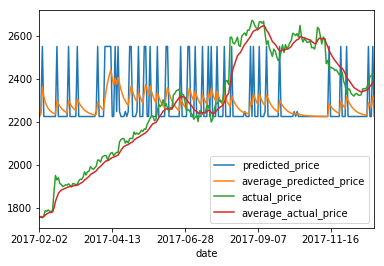

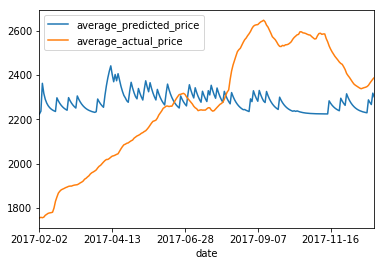

In [67]:
from treeinterpreter import treeinterpreter as ti
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month


prediction_list = []

# Splitting the training and testing data
#train_start_date = str(year) + '-01-01'
#train_end_date = str(year) + '-10-31'
#test_start_date = str(year) + '-11-01'
#test_end_date = str(year) + '-12-31'
#train = df.ix[train_start_date : train_end_date]
#test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([train.loc[date, 'compound'],train.loc[date, 'neg'],train.loc[date, 'neu'],train.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([test.loc[date, 'compound'],test.loc[date, 'neg'],test.loc[date, 'neu'],test.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

 # Generating models
lr = LogisticRegression()
lr.fit(numpy_df_train, train['prices'])

prediction = lr.predict(numpy_df_test)
prediction_list.append(prediction)
#print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date

test_start_date = '2017-02-02'
test_end_date = '2018-01-02'
#train_start_date = '2013-05-13'
#train_end_date = '2017-01-26'
#idx = pd.date_range(test_start_date, test_end_date)
idx = test.index
#print year
predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list,idx)
# Adding offset to all the advpredictions_df price values
predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

#predictions_df_list['actual_value'] = test['prices']
#predictions_df_list.plot()
# Smoothing the plot
predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10)
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10)
# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()
#plt.plot( range(0,test.shape[0]), predictions_df_list, range(0,test.shape[0]), test_data.loc[:,'prices'].as_matrix())
#predictions_df_list.show()
plt.show()




    


In [68]:
lr.classes_

array([ 982,  993,  995,  996,  998, 1000, 1001, 1003, 1005, 1012, 1014,
       1017, 1020, 1022, 1023, 1024, 1031, 1033, 1036, 1041, 1042, 1043,
       1046, 1047, 1048, 1051, 1052, 1055, 1058, 1062, 1063, 1064, 1065,
       1069, 1073, 1074, 1077, 1078, 1080, 1082, 1090, 1093, 1096, 1098,
       1104, 1108, 1110, 1112, 1116, 1125, 1128, 1129, 1134, 1135, 1136,
       1141, 1145, 1147, 1149, 1154, 1157, 1158, 1167, 1178, 1182, 1189,
       1193, 1196, 1197, 1198, 1200, 1203, 1205, 1207, 1208, 1209, 1210,
       1214, 1216, 1218, 1219, 1220, 1222, 1223, 1224, 1225, 1226, 1227,
       1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238,
       1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249,
       1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260,
       1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272,
       1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283,
       1284, 1285, 1286, 1288, 1290, 1291, 1292, 12

In [69]:
lr.coef_[0]

array([-0.01864708, -0.46127852, -2.48415651, -0.44333954])

In [70]:
from sklearn import metrics
import numpy as np


# calculate MAE using scikit-learn
mae=metrics.mean_absolute_error(test['prices'], predictions_df_list['predicted_price'])
print('MAE:',mae)



MAE: 245.835422874
